In [106]:
import h5py
import datetime as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from geopy.distance import geodesic

In [99]:
#read te wanted granule
file = h5py.File('isdata.h5')
#Define the wanted H5 subdirectories
gt3l_h_group = file['/gt3l/heights']
gt3l_geo_group = file['/gt3l/geolocation']

#Define the segents of interest
seg_start = 12500
seg_count = 50
#Define the individual photons in the segments
seg_ph = gt3l_geo_group['segment_ph_cnt'][:]
ph_start =  sum(seg_ph[:seg_start])
seg_ph_count = gt3l_geo_group['segment_ph_cnt'][seg_start:seg_start+seg_count]
ph_count = sum(seg_ph_count)

#Get the phton coordinates
ph_lon = gt3l_h_group['lon_ph'][ph_start:ph_count+ph_start]
ph_lat = gt3l_h_group['lat_ph'][ph_start:ph_count+ph_start]

# Get the photon heights
ph_h = gt3l_h_group['h_ph'][ph_start:ph_count+ph_start]

#Get the photon confidence 
ph_conf = gt3l_h_group['signal_conf_ph'][ph_start:ph_count+ph_start,:]
#Find low,mid and high conf photons
mask = (ph_conf >= 2).any(axis=1) 
    # Filter photon heights based on the confidence
filtered_ph_h = ph_h[mask]
filtered_ph_lat = ph_lat[mask]
filtered_ph_lon = ph_lon[mask]

In [119]:
# Calculate along track distance
total_distance = 0
reference = (filtered_ph_lat[0], filtered_ph_lon[0])
    # Calculate distance for each successive point
distances = np.zeros(len(filtered_ph_lat))
for i in range(0,len(filtered_ph_lat)):
    distances[i] = geodesic(reference, [filtered_ph_lat[i], filtered_ph_lon[i]]).meters

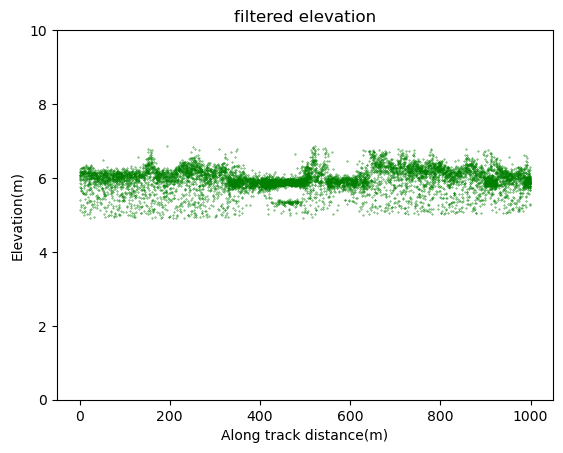

In [122]:
plt.scatter(distances,filtered_ph_h, color='green', s=0.1)
plt.ylim([0,10])
plt.title('filtered elevation')
plt.xlabel('Along track distance(m)')
plt.ylabel('Elevation(m)')
plt.grid(False)
plt.show()

In [63]:
#plt.scatter(filtered_ph_lon[7150:8100],filtered_ph_h[7150:8100], color='green', s=1)
#plt.ylim([0,10])
#plt.title('photon distribution')
#plt.xlabel('longtitude')
#plt.ylabel('Elevation(m)')
#plt.grid(False)
#plt.show()

In [144]:
# x shot aggregate
shot = 5
num_shot = len(filtered_ph_h) - shot + 1

# Aggregate photon heights, lat and lon over the specified shot size
aggregated_ph_h = np.zeros(num_shot)
aggregated_ph_lon = np.zeros(num_shot)
aggregated_ph_lat = np.zeros(num_shot)
for i in range(num_shot):
    shot_ph_h = filtered_ph_h[i:i+shot]
    aggregated_ph_h[i] = np.mean(shot_ph_h)
    
    shot_ph_lat = filtered_ph_lat[i:i+shot]
    aggregated_ph_lat[i] = np.mean(shot_ph_lat)
    
    shot_ph_lon = filtered_ph_lon[i:i+shot]
    aggregated_ph_lon[i] = np.mean(shot_ph_lon)

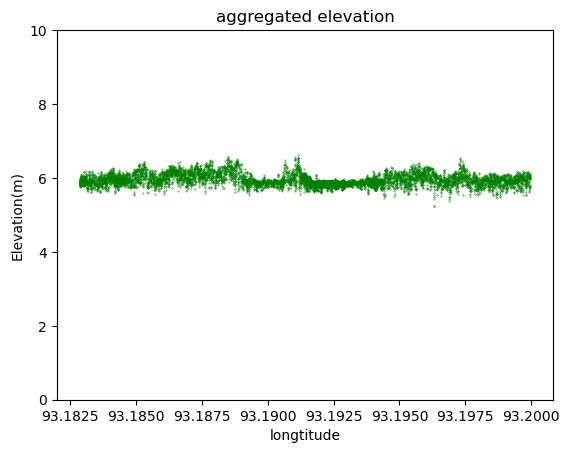

In [145]:
plt.scatter(aggregated_ph_lon,aggregated_ph_h, color='green', s=0.1)
plt.ylim([0,10])
plt.title('aggregated elevation')
plt.xlabel('longtitude')
plt.ylabel('Elevation(m)')
plt.grid(False)
plt.show() 

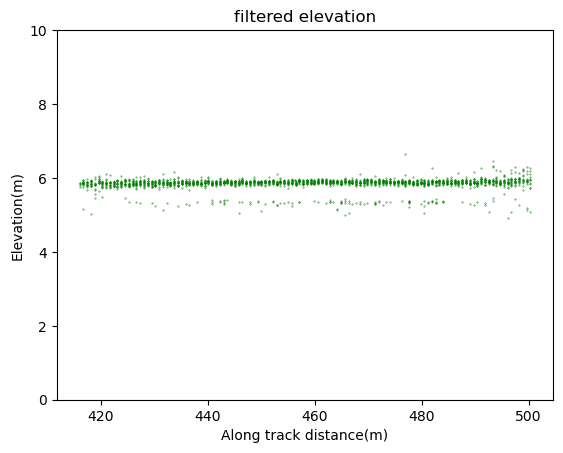

In [133]:
plt.scatter(distances[3500:5500],filtered_ph_h[3500:5500], color='green', s=0.1)
plt.ylim([0,10])
plt.title('filtered elevation')
plt.xlabel('Along track distance(m)')
plt.ylabel('Elevation(m)')
plt.grid(False)
plt.show()

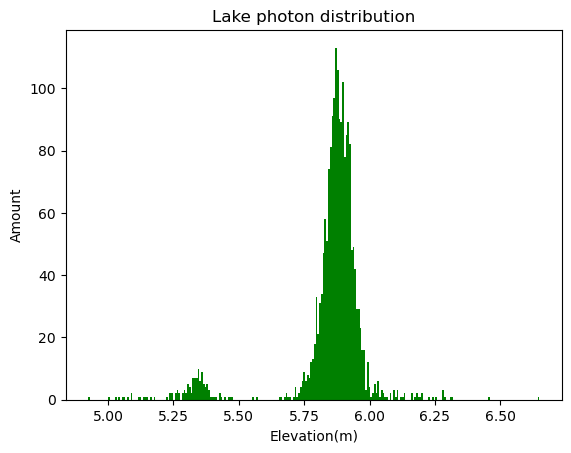

In [142]:
plt.hist(filtered_ph_h[3500:5500],bins=256, color='green')
plt.title('Filtered Lake photon distribution')
plt.xlabel('Elevation(m)')
plt.ylabel('Amount')
plt.grid(False)
plt.show()

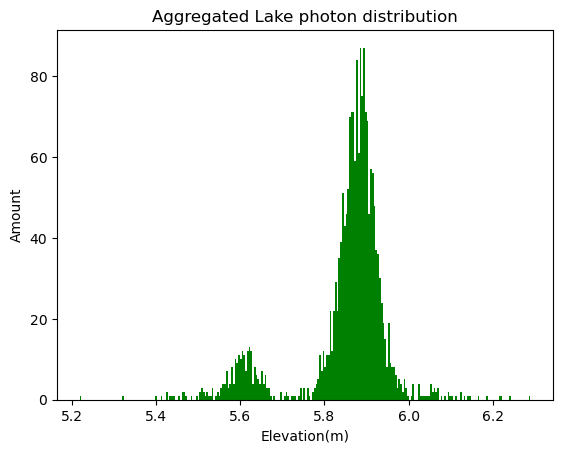

In [143]:
plt.hist(aggregated_ph_h[3500:5500],bins=256, color='green')
plt.title('Aggregated Lake photon distribution')
plt.xlabel('Elevation(m)')
plt.ylabel('Amount')
plt.grid(False)
plt.show()